In [8]:
import math as m
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def S(basis) :
    N = basis.shape[0]
    Overlap_matrix = np.zeros((N,N))
    for p in range(N) :
        for q in range(p,N) :
            Overlap_matrix[p,q] = (np.pi/(basis[p] + basis[q]))**(3/2)
            Overlap_matrix[q,p] = Overlap_matrix[p,q]
    return Overlap_matrix

def T(basis) :
    N = basis.shape[0]
    Kintetic_matrix = np.zeros((N,N))
    for p in range(N) :
        for q in range(p,N) :
            Kintetic_matrix[p,q] = 3*basis[p]*basis[q]*np.pi**(3/2)/(basis[p] + basis[q])**(5/2)
            Kintetic_matrix[q,p] = Kintetic_matrix[p,q]
    return Kintetic_matrix

def A(basis) :
    N = basis.shape[0]
    Coulomb_matrix = np.zeros((N,N))
    for p in range(N) :
        for q in range(p,N) :
            Coulomb_matrix[p,q] = -2*np.pi/(basis[p] + basis[q])
            Coulomb_matrix[q,p] = Coulomb_matrix[p,q]
    return Coulomb_matrix

def Gaussian(alpha, r):
    return m.exp(-alpha*r**2)

In [10]:
def Hydrogen(a0,a1,a2,a3,print_eigenfunction) :
    basis = np.array([a0, a1, a2, a3])
    S_matrix = S(basis)
    T_matrix = T(basis)
    A_matrix = A(basis)

    eigenenergy, eigenfunction = eigh((T_matrix + A_matrix), S_matrix)
    eigenenergy = np.min(eigenenergy)
    if print_eigenfunction == 1 :
        eigenfunction = eigenfunction[:,np.argmin(eigenenergy)]
        print(eigenfunction)
    return eigenenergy


[ 1.43579346 -3.30900597  4.23714972 -1.72116259]


array([ 1.43579346, -3.30900597,  4.23714972, -1.72116259])

In [4]:
def GD(a0,a1,a2,a3,step_size,limit) :
    gradient = np.array([[Hydrogen(a0+0.00001,a1,a2,a3,0) - Hydrogen(a0,a1,a2,a3,0)], [Hydrogen(a0,a1+0.00001,a2,a3,0) - Hydrogen(a0,a1,a2,a3,0)], [Hydrogen(a0,a1,a2+0.00001,a3,0) - Hydrogen(a0,a1,a2,a3,0)], [Hydrogen(a0,a1,a2,a3+0.00001,0) - Hydrogen(a0,a1,a2,a3,0)]])/0.00001
    i = 0
    data = np.array([[i],[Hydrogen(a0,a1,a2,a3,0)],[a0],[a1],[a2],[a3],[np.linalg.norm(gradient)]])
    while i < limit and np.linalg.norm(gradient) > 0.00001:
        a0 = a0 - step_size*gradient[0,0]
        a1 = a1 - step_size*gradient[1,0]
        a2 = a2 - step_size*gradient[2,0]
        a3 = a3 - step_size*gradient[3,0]
        i += 1
        gradient = np.array([[Hydrogen(a0+0.00001,a1,a2,a3,0) - Hydrogen(a0,a1,a2,a3,0)], [Hydrogen(a0,a1+0.00001,a2,a3,0) - Hydrogen(a0,a1,a2,a3,0)], [Hydrogen(a0,a1,a2+0.00001,a3,0) - Hydrogen(a0,a1,a2,a3,0)], [Hydrogen(a0,a1,a2,a3+0.00001,0) - Hydrogen(a0,a1,a2,a3,0)]])/0.000001
        data = np.append(data,[[i],[Hydrogen(a0,a1,a2,a3,0)],[a0],[a1],[a2],[a3],[np.linalg.norm(gradient)]], axis = 1)
    return data

def MGD(a0,a1,a2,a3,step_size,limit) :
    gradient = np.array([[Hydrogen(a0+0.00001,a1,a2,a3,0) - Hydrogen(a0,a1,a2,a3,0)], [Hydrogen(a0,a1+0.00001,a2,a3,0) - Hydrogen(a0,a1,a2,a3,0)], [Hydrogen(a0,a1,a2+0.00001,a3,0) - Hydrogen(a0,a1,a2,a3,0)], [Hydrogen(a0,a1,a2,a3+0.00001,0) - Hydrogen(a0,a1,a2,a3,0)]])/0.00001
    v = np.zeros((4,1))
    i = 0
    data = np.array([[i],[Hydrogen(a0,a1,a2,a3,0)],[a0],[a1],[a2],[a3],[np.linalg.norm(gradient)]])
    while i < limit and np.linalg.norm(gradient) > 0.000001:
        v = step_size*gradient + 0.9*v
        a0 = a0 - v[0,0]
        a1 = a1 - v[1,0]
        a2 = a2 - v[2,0]
        a3 = a3 - v[3,0]
        i += 1
        gradient = np.array([[Hydrogen(a0+0.00001,a1,a2,a3,0) - Hydrogen(a0,a1,a2,a3,0)], [Hydrogen(a0,a1+0.00001,a2,a3,0) - Hydrogen(a0,a1,a2,a3,0)], [Hydrogen(a0,a1,a2+0.00001,a3,0) - Hydrogen(a0,a1,a2,a3,0)], [Hydrogen(a0,a1,a2,a3+0.00001,0) - Hydrogen(a0,a1,a2,a3,0)]])/0.000001
        data = np.append(data,[[i],[Hydrogen(a0,a1,a2,a3,0)],[a0],[a1],[a2],[a3],[np.linalg.norm(gradient)]], axis = 1)
    return data
def NAG(a0,a1,a2,a3,step_size,limit) :
    gradient = np.array([[Hydrogen(a0+0.00001,a1,a2,a3,0) - Hydrogen(a0,a1,a2,a3,0)], [Hydrogen(a0,a1+0.00001,a2,a3,0) - Hydrogen(a0,a1,a2,a3,0)], [Hydrogen(a0,a1,a2+0.00001,a3,0) - Hydrogen(a0,a1,a2,a3,0)], [Hydrogen(a0,a1,a2,a3+0.00001,0) - Hydrogen(a0,a1,a2,a3,0)]])/0.00001
    v = np.zeros((4,1))
    i = 0
    data = np.array([[i],[Hydrogen(a0,a1,a2,a3,0)],[a0],[a1],[a2],[a3],[np.linalg.norm(gradient)]])
    while i < limit and np.linalg.norm(gradient) > 0.000001:
        v = step_size*gradient + 0.9*v
        a0 = a0 - v[0,0]
        a1 = a1 - v[1,0]
        a2 = a2 - v[2,0]
        a3 = a3 - v[3,0]
        i += 1
        b0 = a0 - v[0,0]
        b1 = a1 - v[1,0]
        b2 = a2 - v[2,0]
        b3 = a3 - v[3,0]
        gradient = np.array([[Hydrogen(b0+0.00001,b1,b2,b3,0) - Hydrogen(b0,b1,b2,b3,0)], [Hydrogen(b0,b1+0.00001,b2,b3,0) - Hydrogen(b0,b1,b2,b3,0)], [Hydrogen(b0,b1,b2+0.00001,b3,0) - Hydrogen(b0,b1,b2,b3,0)], [Hydrogen(b0,b1,b2,b3+0.00001,0) - Hydrogen(b0,b1,b2,b3,0)]])/0.00001
        data = np.append(data,[[i],[Hydrogen(a0,a1,a2,a3,0)],[a0],[a1],[a2],[a3],[np.linalg.norm(gradient)]], axis = 1)
    return data

[ 1.00000000e+04 -4.98812517e-01  9.14613473e-02  3.37765460e-01
  1.29611803e+00  8.15958591e+00  3.99009263e-01]


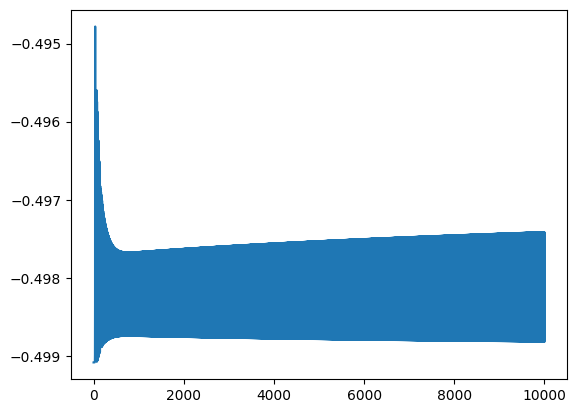

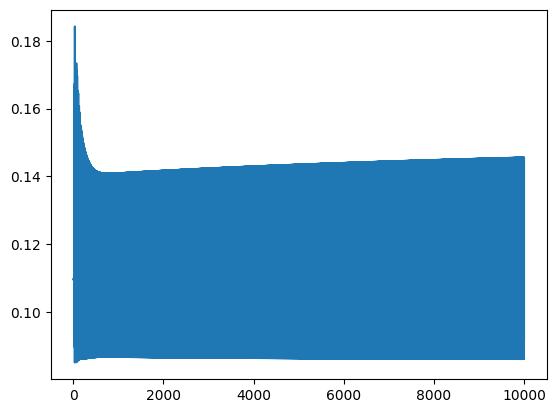

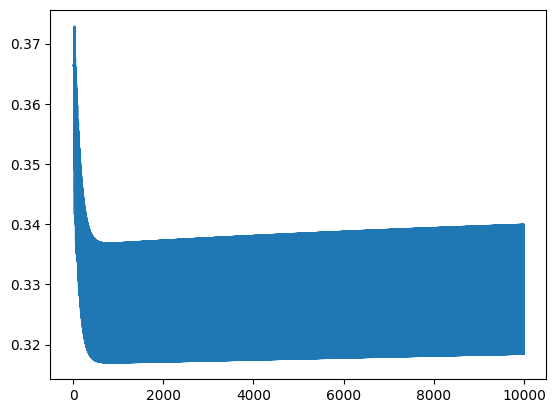

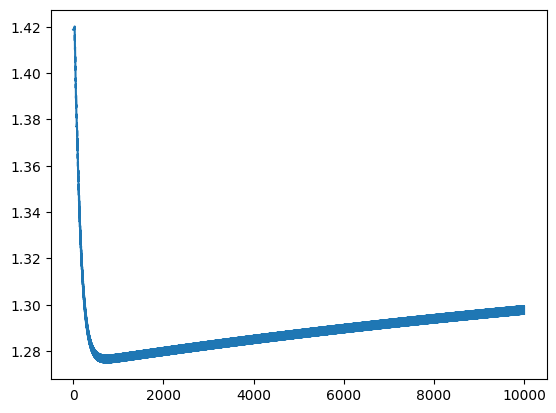

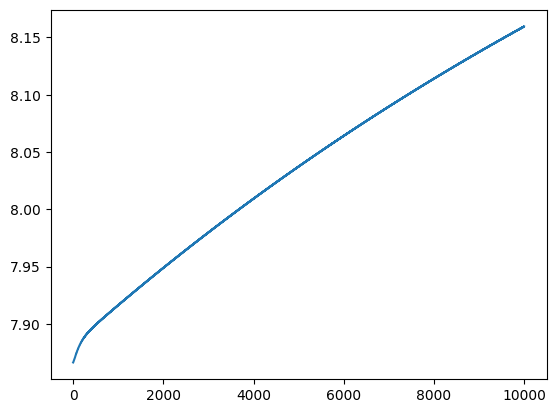

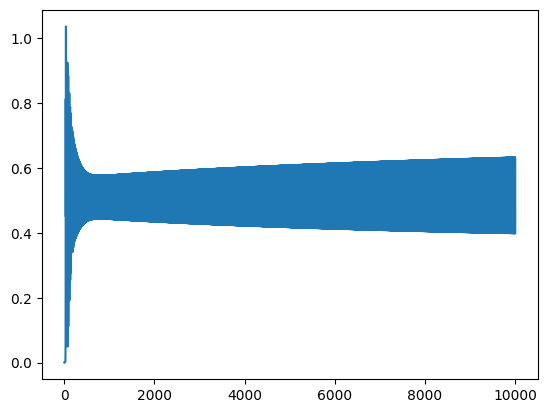

In [5]:
test1 = GD(0.109670672,0.366390847, 1.41877401,7.86625265,0.1,10000)
for ele in range(1,7) :
    plt.figure(ele)
    plt.plot(test1[0,:],test1[ele,:])
print(test1[:,-1])

[ 1.00000000e+04 -4.99268679e-01  1.19279648e-01  4.26698987e-01
  1.82785516e+00  1.15502022e+01  1.42893722e-04]


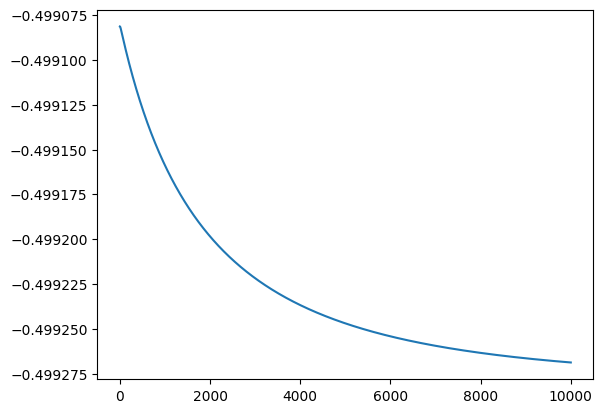

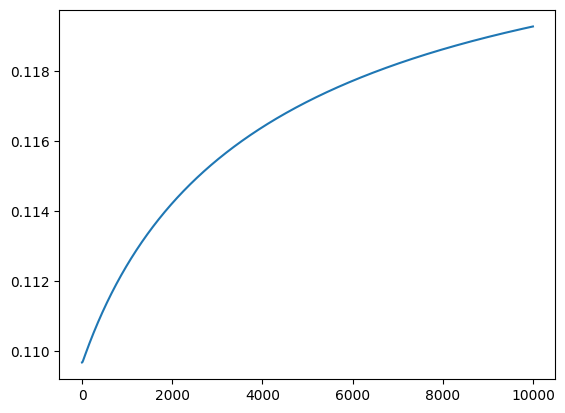

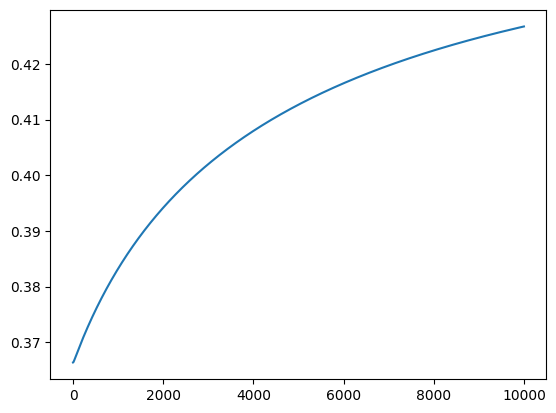

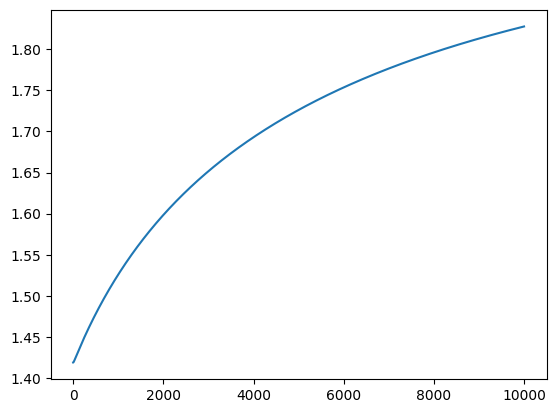

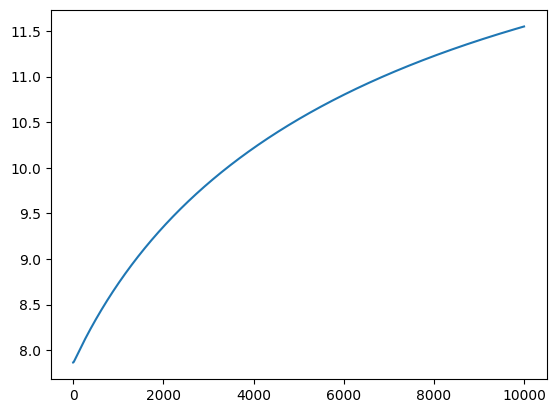

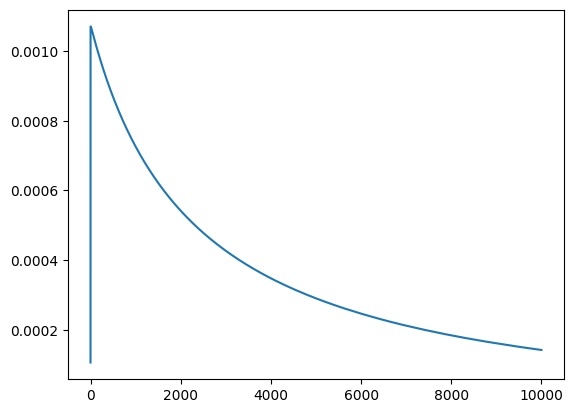

In [6]:
test2 = MGD(0.109670672,0.366390847, 1.41877401,7.86625265,0.1,10000)
for ele in range(1,7) :
    plt.figure(ele)
    plt.plot(test2[0,:],test2[ele,:])
print(test2[:,-1])

In [1]:
test3 = NAG(0.109670672,0.366390847, 1.41877401,7.86625265,0.1,10000)
for ele in range(1,7) :
    plt.figure(ele)
    plt.plot(test3[0,:],test3[ele,:])
print(test3[:,-1])

NameError: name 'NAG' is not defined